# Telecom Churn Prediction Case Study

The goal of this notebook is to provide an overview of how write a notebook and create a submission file that successfully solves the churn prediction problem. Please download the datasets, unzip and place them in the same folder as this notebook.



We are going to follow the process called CRISP-DM.



<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b9/CRISP-DM_Process_Diagram.png/639px-CRISP-DM_Process_Diagram.png" style="height: 400px; width:400px;"/>



After Business and Data Understanding via EDA, we want to prepare data for modelling. Then evaluate and submit our predictions.

# 0. Problem statement:-



In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.



For many incumbent operators, retaining high profitable customers is the number one business

goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, you will analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn, and identify the main indicators of churn.



In this competition, your goal is *to build a machine learning model that is able to predict churning customers based on the features provided for their usage.*



**Customer behaviour during churn:**



Customers usually do not decide to switch to another competitor instantly, but rather over a

period of time (this is especially applicable to high-value customers). In churn prediction, we

assume that there are three phases of customer lifecycle :



1. <u>The ‘good’ phase:</u> In this phase, the customer is happy with the service and behaves as usual.



2. <u>The ‘action’ phase:</u> The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. It is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)



3. <u>The ‘churn’ phase:</u> In this phase, the customer is said to have churned. In this case, since you are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month (September) is the ‘churn’ phase.

# I. Loading dependencies & datasets:-



Lets start by loading our dependencies. We can keep adding any imports to this cell block, as we write mode and mode code.

In [1]:
#Data Structures

import pandas as pd
import numpy as np
import re
import os



### For installing missingno library, type this command in terminal

#pip install missingno



#import missingno as msno



#Sklearn

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score

# Import XGBoost
import xgboost as xgb

# SMOTE for handling class imbalance
from imblearn.over_sampling import SMOTE


#Plotting

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns



#Others

import warnings
warnings.filterwarnings('ignore')


%matplotlib inline

ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py)

Next, we load our datasets and the data dictionary file.



The **train.csv** file contains both dependent and independent features, while the **test.csv** contains only the independent variables. 



So, for model selection, I will create our own train/test dataset from the **train.csv** and use the model to predict the solution using the features in unseen test.csv data for submission.

In [1]:
#COMMENT THIS SECTION INCASE RUNNING THIS NOTEBOOK LOCALLY



#Checking the kaggle paths for the uploaded datasets

#import os

#for dirname, _, filenames in os.walk('/kaggle/input'):

  #  for filename in filenames:

      #  print(os.path.join(dirname, filename))

In [2]:
#INCASE RUNNING THIS LOCALLY, PASS THE RELATIVE PATH OF THE CSV FILES BELOW

#(e.g. if files are in same folder as notebook, simple write "train.csv" as path)



data = pd.read_csv(r"C:\Users\Dell\Downloads\telecom-churn-case-study-hackathon-c-65\train.csv")
unseen = pd.read_csv(r"C:\Users\Dell\Downloads\telecom-churn-case-study-hackathon-c-65\test.csv")
sample = pd.read_csv(r"C:\Users\Dell\Downloads\telecom-churn-case-study-hackathon-c-65\sample.csv")
data_dict = pd.read_csv(r"C:\Users\Dell\Downloads\telecom-churn-case-study-hackathon-c-65\data_dictionary.csv")




NameError: name 'pd' is not defined

# II. Data Understanding and Data Preparation:-



1. Lets analyze the data dictionary versus the churn dataset.

2. The data dictonary contains a list of abbrevations which provides us all the information we need to understand what a specific feature/variable in the churn dataset represents

3. Its important to understand the definitions of each feature that we are working with.

id: Unique identifier for each customer record

circle_id: Telecom circle area to which the customer belongs

loc_og_t2o_mou: Local outgoing calls within the same telecom circle to other operator fixed line - minutes of usage for voice calls

std_og_t2o_mou: STD outgoing calls outside the calling circle to other operator fixed line - minutes of usage for voice calls

loc_ic_t2o_mou: Local incoming calls within the same telecom circle to other operator fixed line - minutes of usage for voice calls

last_date_of_month_6: Last date of the month in June

last_date_of_month_7: Last date of the month in July

last_date_of_month_8: Last date of the month in August

arpu_6: Average revenue per user in June

arpu_7: Average revenue per user in July

arpu_8: Average revenue per user in August

onnet_mou_6: Minutes of usage for all kinds of voice calls within the same operator network in June

onnet_mou_7: Minutes of usage for all kinds of voice calls within the same operator network in July

onnet_mou_8: Minutes of usage for all kinds of voice calls within the same operator network in August

offnet_mou_6: Minutes of usage for all kinds of voice calls outside the operator network in June

offnet_mou_7: Minutes of usage for all kinds of voice calls outside the operator network in July

offnet_mou_8: Minutes of usage for all kinds of voice calls outside the operator network in August

roam_ic_mou_6: Minutes of usage for incoming voice calls in June - Indicates the customer is in a roaming zone during the call

roam_ic_mou_7: Minutes of usage for incoming voice calls in July - Indicates the customer is in a roaming zone during the call

roam_ic_mou_8: Minutes of usage for incoming voice calls in August - Indicates the customer is in a roaming zone during the call

roam_og_mou_6: Minutes of usage for outgoing voice calls in June - Indicates the customer is in a roaming zone during the call

roam_og_mou_7: Minutes of usage for outgoing voice calls in July - Indicates the customer is in a roaming zone during the call

roam_og_mou_8: Minutes of usage for outgoing voice calls in August - Indicates the customer is in a roaming zone during the call

loc_og_t2t_mou_6: Local outgoing calls within the same telecom circle - Operator to same operator (mobile to mobile) - Minutes of usage for voice calls - June

loc_og_t2t_mou_7: Local outgoing calls within the same telecom circle - Operator to same operator (mobile to mobile) - Minutes of usage for voice calls - July

loc_og_t2t_mou_8: Local outgoing calls within the same telecom circle - Operator to same operator (mobile to mobile) - Minutes of usage for voice calls - August

loc_og_t2m_mou_6: Local outgoing calls within the same telecom circle - Operator to other operator mobile - Minutes of usage for voice calls - June

loc_og_t2m_mou_7: Local outgoing calls within the same telecom circle - Operator to other operator mobile - Minutes of usage for voice calls - July

loc_og_t2m_mou_8: Local outgoing calls within the same telecom circle - Operator to other operator mobile - Minutes of usage for voice calls - August

loc_og_t2f_mou_6: Local outgoing calls within the same telecom circle - Operator to fixed line of T - Minutes of usage for voice calls - June

loc_og_t2f_mou_7: Local outgoing calls within the same telecom circle - Operator to fixed line of T - Minutes of usage for voice calls - July

loc_og_t2f_mou_8: Local outgoing calls within the same telecom circle - Operator to fixed line of T - Minutes of usage for voice calls - August

loc_og_t2c_mou_6: Local outgoing calls within the same telecom circle - Operator to its own call center - Minutes of usage for voice calls - June

loc_og_t2c_mou_7: Local outgoing calls within the same telecom circle - Operator to its own call center - Minutes of usage for voice calls - July

loc_og_t2c_mou_8: Local outgoing calls within the same telecom circle - Operator to its own call center -  Minutes of usage for voice calls - August

loc_og_mou_6: Local outgoing calls within the same telecom circle - Minutes of usage for voice calls - June

loc_og_mou_7: Local outgoing calls within the same telecom circle - Minutes of usage for voice calls - July

loc_og_mou_8: Local outgoing calls within the same telecom circle - Minutes of usage for voice calls - August

std_og_t2t_mou_6: STD outgoing calls outside the calling circle - Operator to same operator (mobile to mobile) -  Minutes of usage for voice calls - June

std_og_t2t_mou_7: STD outgoing calls outside the calling circle - Operator to same operator (mobile to mobile) - Minutes of usage for voice calls - July

std_og_t2t_mou_8: STD outgoing calls outside the calling circle - Operator to same operator (mobile to mobile) - Minutes of usage for voice calls - August

std_og_t2m_mou_6: STD outgoing calls outside the calling circle - Operator to other operator mobile - Minutes of usage for voice calls - June

std_og_t2m_mou_7: STD outgoing calls outside the calling circle - Operator to other operator mobile - Minutes of usage for voice calls - July

std_og_t2m_mou_8: STD outgoing calls outside the calling circle - Operator to other operator mobile - Minutes of usage for voice calls - August

std_og_t2f_mou_6: STD outgoing calls outside the calling circle - Operator to fixed line of T - Minutes of usage for voice calls - June

std_og_t2f_mou_7: STD outgoing calls outside the calling circle - Operator to fixed line of T - Minutes of usage for voice calls - July

std_og_t2f_mou_8: STD outgoing calls outside the calling circle - Operator to fixed line of T - Minutes of usage for voice calls - August

std_og_t2c_mou_6: STD outgoing calls outside the calling circle - Operator to its own call center - Minutes of usage for voice calls - June

std_og_t2c_mou_7: STD outgoing calls outside the calling circle - Operator to its own call center - Minutes of usage for voice calls - July

std_og_t2c_mou_8: STD outgoing calls outside the calling circle - Operator to its own call center - Minutes of usage for voice calls - August

std_og_mou_6: STD outgoing calls outside the calling circle - Minutes of usage for voice calls - June

std_og_mou_7: STD outgoing calls outside the calling circle - Minutes of usage for voice calls - July

std_og_mou_8: STD outgoing calls outside the calling circle - Minutes of usage for voice calls - August

isd_og_mou_6: ISD outgoing calls - Minutes of usage for voice calls - June

isd_og_mou_7: ISD outgoing calls - Minutes of usage for voice calls - July

isd_og_mou_8: ISD outgoing calls - Minutes of usage for voice calls - August

spl_og_mou_6: Special outgoing calls - Minutes of usage for voice calls - June

spl_og_mou_7: Special outgoing calls - Minutes of usage for voice calls - July

spl_og_mou_8: Special outgoing calls - Minutes of usage for voice calls - August

og_others_6: Total minutes of usage (MOU) for other types of outgoing voice calls made by the customer in the month of June

og_others_7: Total minutes of usage (MOU) for other types of outgoing voice calls made by the customer in the month of July

og_others_8: Total minutes of usage (MOU) for other types of outgoing voice calls made by the customer in the month of August

total_og_mou_6: Total outgoing minutes of usage for all kinds of voice calls - Minutes of usage for voice calls - June

total_og_mou_7: Total outgoing minutes of usage for all kinds of voice calls - Minutes of usage for voice calls - July

total_og_mou_8: Total outgoing minutes of usage for all kinds of voice calls - Minutes of usage for voice calls - August

loc_ic_t2t_mou_6: Local incoming calls within the same telecom circle - Operator to same operator (mobile to mobile) - Minutes of usage for voice calls - June

loc_ic_t2t_mou_7: Local incoming calls within the same telecom circle - Operator to same operator (mobile to mobile) - Minutes of usage for voice calls - July

loc_ic_t2t_mou_8: Local incoming calls within the same telecom circle - Operator to same operator (mobile to mobile) - Minutes of usage for voice calls - August

loc_ic_t2m_mou_6: Local incoming calls within the same telecom circle - Operator to other operator mobile - Minutes of usage for voice calls - June

loc_ic_t2m_mou_7: Local incoming calls within the same telecom circle - Operator to other operator mobile - Minutes of usage for voice calls - July

loc_ic_t2m_mou_8: Local incoming calls within the same telecom circle - Operator to other operator mobile - Minutes of usage for voice calls - August

loc_ic_t2f_mou_6: Local incoming calls within the same telecom circle - Operator to fixed line of T - Minutes of usage for voice calls - June

loc_ic_t2f_mou_7: Local incoming calls within the same telecom circle - Operator to fixed line of T - Minutes of usage for voice calls - July

loc_ic_t2f_mou_8: Local incoming calls within the same telecom circle - Operator to fixed line of T - Minutes of usage for voice calls - August

loc_ic_mou_6: Local incoming calls within the same telecom circle - Minutes of usage for voice calls - June

loc_ic_mou_7: Local incoming calls within the same telecom circle - Minutes of usage for voice calls - July

loc_ic_mou_8: Local incoming calls within the same telecom circle - Minutes of usage for voice calls - August

std_ic_t2t_mou_6: STD incoming calls outside the calling circle - Operator to same operator (mobile to mobile) - Minutes of usage for voice calls - June

std_ic_t2t_mou_7: STD incoming calls outside the calling circle - Operator to same operator (mobile to mobile) - Minutes of usage for voice calls - July

std_ic_t2t_mou_8: STD incoming calls outside the calling circle - Operator to same operator (mobile to mobile) - Minutes of usage for voice calls - August

std_ic_t2m_mou_6: STD incoming calls outside the calling circle - Operator to other operator mobile - Minutes of usage for voice calls - June

std_ic_t2m_mou_7: STD incoming calls outside the calling circle - Operator to other operator mobile - Minutes of usage for voice calls - July

std_ic_t2m_mou_8: STD incoming calls outside the calling circle - Operator to other operator mobile - Minutes of usage for voice calls - August

std_ic_t2f_mou_6: STD incoming calls outside the calling circle - Operator to fixed line of T - Minutes of usage for voice calls - June

std_ic_t2f_mou_7: STD incoming calls outside the calling circle - Operator to fixed line of T - Minutes of usage for voice calls - July

std_ic_t2f_mou_8: STD incoming calls outside the calling circle - Operator to fixed line of T - Minutes of usage for voice calls - August

std_ic_t2o_mou_6: STD incoming calls outside the calling circle - Operator T to other operator fixed line - Minutes of usage for voice calls - June


std_ic_t2o_mou_7 STD incoming calls outside the calling circle - Operator T to other operator fixed line - Minutes of usage for voice calls - July:

std_ic_t2o_mou_8 STD incoming calls outside the calling circle - Operator T to other operator fixed line - Minutes of usage for voice calls - August:

std_ic_mou_6: STD incoming calls outside the calling circle - Minutes of usage for voice calls - June

std_ic_mou_7: STD incoming calls outside the calling circle - Minutes of usage for voice calls - July

std_ic_mou_8: STD incoming calls outside the calling circle - Minutes of usage for voice calls - August

total_ic_mou_6 Total incoming Calls - Minutes of usage for voice calls - June:

total_ic_mou_7 Total incoming Calls - Minutes of usage for voice calls - July:

total_ic_mou_8 Total incoming Calls - Minutes of usage for voice calls - August:

spl_ic_mou_6 Special incoming Calls - Minutes of usage for voice calls - June:

spl_ic_mou_7 Special incoming Calls - Minutes of usage for voice calls - July:

spl_ic_mou_8 Special incoming Calls - Minutes of usage for voice calls - August:

isd_ic_mou_6: Minutes of usage for incoming calls from ISD (International Subscriber Dialing) - June

isd_ic_mou_7: Minutes of usage for incoming calls from ISD (International Subscriber Dialing) - July

isd_ic_mou_8: Minutes of usage for incoming calls from ISD (International Subscriber Dialing) - August

ic_others_6: Minutes of usage for incoming calls from other sources - June

ic_others_7: Minutes of usage for incoming calls from other sources - July

ic_others_8: Minutes of usage for incoming calls from other sources - August

total_rech_num_6: Total number of recharges made by the customer in June

total_rech_num_7: Total number of recharges made by the customer in July

total_rech_num_8: Total number of recharges made by the customer in August

total_rech_amt_6: Total amount of recharges made by the customer in June

total_rech_amt_7: Total amount of recharges made by the customer in July

total_rech_amt_8: Total amount of recharges made by the customer in August

max_rech_amt_6: Maximum recharge amount made by the customer in June

max_rech_amt_7: Maximum recharge amount made by the customer in July

max_rech_amt_8: Maximum recharge amount made by the customer in August

date_of_last_rech_6: Date of the last recharge made by the customer in June

date_of_last_rech_7: Date of the last recharge made by the customer in July

date_of_last_rech_8: Date of the last recharge made by the customer in August

last_day_rch_amt_6: Amount of the last recharge made on the last day of June

last_day_rch_amt_7: Amount of the last recharge made on the last day of July

last_day_rch_amt_8: Amount of the last recharge made on the last day of August

date_of_last_rech_data_6: Date of the last data recharge made by the customer in June

date_of_last_rech_data_7: Date of the last data recharge made by the customer in July

date_of_last_rech_data_8: Date of the last data recharge made by the customer in August

total_rech_data_6: Total data recharge in MB made by the customer in June

total_rech_data_7: Total data recharge in MB made by the customer in July

total_rech_data_8: Total data recharge in MB made by the customer in August

max_rech_data_6: Maximum data recharge in MB made by the customer in June

max_rech_data_7: Maximum data recharge in MB made by the customer in July

max_rech_data_8: Maximum data recharge in MB made by the customer in August

count_rech_2g_6: Count of 2Gnetwork  recharges made by the customer in June

count_rech_2g_7: Count of 2Gnetwork  recharges made by the customer in July

count_rech_2g_8: Count of 2Gnetwork  recharges made by the customer in August

count_rech_3g_6: Count of 3Gnetwork  recharges made by the customer in June

count_rech_3g_7: Count of 3Gnetwork  recharges made by the customer in July

count_rech_3g_8: Count of 3Gnetwork  recharges made by the customer in August

av_rech_amt_data_6: Average recharge amount for data in June

av_rech_amt_data_7: Average recharge amount for data in July

av_rech_amt_data_8: Average recharge amount for data in August

vol_2g_mb_6: Volume of 2Gnetwork  data used in MB in June

vol_2g_mb_7: Volume of 2Gnetwork  data used in MB in July

vol_2g_mb_8: Volume of 2Gnetwork  data used in MB in August

vol_3g_mb_6: Volume of 3Gnetwork  data used in MB in June

vol_3g_mb_7: Volume of 3Gnetwork  data used in MB in July

vol_3g_mb_8: Volume of 3Gnetwork  data used in MB in August

arpu_3g_6: Average revenue per user for 3Gnetwork  services in June

arpu_3g_7: Average revenue per user for 3Gnetwork  services in July

arpu_3g_8: Average revenue per user for 3Gnetwork  services in August

arpu_2g_6: Average revenue per user for 2Gnetwork  services in June

arpu_2g_7: Average revenue per user for 2Gnetwork  services in July

arpu_2g_8: Average revenue per user for 2Gnetwork  services in August

night_pck_user_6: Indicates if the customer is subscribed to night pack in June

night_pck_user_7: Indicates if the customer is subscribed to night pack in July

night_pck_user_8: Indicates if the customer is subscribed to night pack in August

monthly_2g_6: Monthly usage in 2Gnetwork  services in June

monthly_2g_7: Monthly usage in 2Gnetwork  services in July

monthly_2g_8: Monthly usage in 2Gnetwork  services in August

sachet_2g_6: Sachet recharge for 2Gnetwork  services in June

sachet_2g_7: Sachet recharge for 2Gnetwork  services in July

sachet_2g_8: Sachet recharge for 2Gnetwork  services in August

monthly_3g_6: Monthly usage in 3Gnetwork  services in June

monthly_3g_7: Monthly usage in 3Gnetwork  services in July

monthly_3g_8: Monthly usage in 3Gnetwork  services in August

sachet_3g_6: Sachet recharge for 3Gnetwork  services in June

sachet_3g_7: Sachet recharge for 3Gnetwork  services in July

sachet_3g_8: Sachet recharge for 3Gnetwork  services in August

fb_user_6: Indicates if the customer is a Facebook user in June

fb_user_7: Indicates if the customer is a Facebook user in July

fb_user_8: Indicates if the customer is a Facebook user in August

aon: Age of the customer in years at the time of the last record

aug_vbc_3g: Volume based cost  when no specific scheme is not purchased and paid as per usage  in 3Gnetwork  in August

jul_vbc_3g:Volume based cost  when no specific scheme is not purchased and paid as per usage in 3Gnetwork  in Julyy

jun_vbc_3g: Volume based cost  when no specific scheme is not purchased and paid as per usage in 3Gnetwork  in Junen

churn_probability: likelihood or probability that a customer will churn

   

In [ ]:
# Print the shapes of the datasets:-

print(data.shape)
print(unseen.shape)
print(sample.shape)
print(data_dict.shape)

In [3]:
data_dict

NameError: name 'data_dict' is not defined

# Initializing variable lists of different categories based on REGEX patterns and Identifying the Columns:-

The approach we use here is to understand each Acronym, figure our what variable might be important and filter out variable names based on the combinations of acrynoms using REGEX. So, if we want the total minutes a person has spent on outgoing calls, we need acronyms, TOTAL, OG and MOU. So corresponding regex is ```total.+og.+mou```


In [ ]:
# Identifying numerical and categorical variables
numerical_variables = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_variables = data.select_dtypes(include=['object', 'category']).columns.tolist()

# Verifying the total number of columns
total_columns = len(numerical_variables) + len(categorical_variables)
print(f"Total number of columns: {total_columns}")

# Identifying ID Columns
ids = ['id','circle_id']

# Identifying the Target Column
target = ['churn_probability']

#Identifying the Features
features = [i for i in data.columns if i not in ids+target]

#Identifying the Variables
variables = ids+features+target

#Setting the Index Column
data = data[variables].set_index('id')

# Important feature groups in the Telecommunication Industry

# 1. Revenue and Usage Features
arpu = [i for i in data.columns if re.search(r'^arpu', i, re.IGNORECASE)]
total_outgoing_minutes = [i for i in data.columns if re.search(r'total.+og.+mou', i, re.IGNORECASE)]
total_incoming_minutes = [i for i in data.columns if re.search(r'total.+ic.+mou', i, re.IGNORECASE)]
total_data_usage = [i for i in data.columns if re.search(r'total_data_vol|data_usage_volume|vol.+[23]g', i, re.IGNORECASE)]
total_usage = [i for i in data.columns if re.search(r'monthly', i, re.IGNORECASE)]

# 2. Recharge and Payment Behavior
recharge_amounts = [i for i in data.columns if re.search(r'rech.+amt', i, re.IGNORECASE)]
recharge_frequency = [i for i in data.columns if re.search(r'rech.+num|monthly_recharge_count', i, re.IGNORECASE)]

# 3. Network Quality and Call Features
roaming_usage = [i for i in data.columns if re.search(r'roam.+mou', i, re.IGNORECASE)]
offnet_usage = [i for i in data.columns if re.search(r'offnet', i, re.IGNORECASE)]
onnet_usage = [i for i in data.columns if re.search(r'onnet', i, re.IGNORECASE)]

# 4. Customer Tenure and Loyalty
age_on_network = [i for i in data.columns if re.search(r'\baon\b|age_on_network', i, re.IGNORECASE)]

# 5. Promotions and Package Subscriptions
special_packages = [i for i in data.columns if re.search(r'pck|monthly_pack|sachet_pack', i, re.IGNORECASE)]

# 6. Churn Probability (Target Variable)
churn_probability = [i for i in data.columns if re.search(r'churn_probability|target', i, re.IGNORECASE)]

# Collecting all lists into a single list of important features
important_features = arpu + total_outgoing_minutes + total_incoming_minutes + total_usage  + \
                     recharge_amounts + recharge_frequency + roaming_usage + offnet_usage + \
                     onnet_usage + age_on_network + special_packages 

# Verifying that these features align with key columns
from collections import OrderedDict
important_features = list(OrderedDict.fromkeys(important_features))  # Removes duplicates while preserving order

#Identifying the Other Features that are not Important
others = [i for i in features if i not in important_features]

# Verify count and print grouped lists
print("\nTotal Important Features:")
print(len(important_features))
print("\nImportant Features List:")
print(important_features)

# Print each group
print("\nARPU Features:")
print(arpu)

print("\nTotal Outgoing Minutes:")
print(total_outgoing_minutes)

print("\nTotal Incoming Minutes:")
print(total_incoming_minutes)

print("\nTotal Data Usage:")
print(total_data_usage)

print("\nTotal Usage:")
print(total_usage)

print("\nRecharge Amounts:")
print(recharge_amounts)

print("\nRecharge Frequency:")
print(recharge_frequency)

print("\nRoaming Usage:")
print(roaming_usage)

print("\nOffnet Usage:")
print(offnet_usage)

print("\nOnnet Usage:")
print(onnet_usage)

print("\nAge on Network:")
print(age_on_network)

print("\nSpecial Packages:")
print(special_packages)

print("\nOther Features:")
print(others)

print("\nChurn Probability:")
print(churn_probability)

# Final check to ensure all columns are assigned only once across these groups
total_important_columns = len(important_features)
print("\nTotal number of unique important columns:")
print(total_important_columns)

In [ ]:
data.head()

# Converting Data Types:-

In [ ]:
# Convert to category data type
to_category_columns = [
    'circle_id', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8',
    'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'monthly_3g_6', 
    'monthly_3g_7', 'monthly_3g_8', 'fb_user_6', 'fb_user_7', 'fb_user_8', 
    'churn_probability'
]

for col in to_category_columns:
    if col in data.columns:
        data[col] = data[col].astype('category')

# Convert to datetime data type
to_datetime_columns = [
    'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
    'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
    'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8'
]

for col in to_datetime_columns:
    if col in data.columns:
        data[col] = pd.to_datetime(data[col], errors='coerce')

# Verify conversions
print(data.dtypes)



Let's look at each variable's datatype:

In [ ]:
data.info(verbose=1)

Let's also summarize the features using the df.describe method:

In [ ]:
data.describe(include="all")

## Removing Columns with unique values in all rows:-


In [ ]:
# Removing columns having unique values in all the rows
unique_cols = [col for col in data.columns if data[col].nunique() == 1]
data.drop(columns=unique_cols, inplace=True)
print("Data shape after dropping unique columns:", data.shape)

## Dropping 'circle_id' Column if there are too many unique values:-

In [ ]:
if 'circle_id' in data.columns:
    print("Unique values in circle_id:", data['circle_id'].unique())
    data.drop(columns='circle_id', inplace=True)
    print("Data shape after dropping 'circle_id':", data.shape)


# III. Creating X, y and Splitting the Train and Test Datasets

In [ ]:
# Creating Features and Target
X = data.drop(columns=target)
y = data[target[0]].cat.codes  # Convert target to numerical codes

print("Features shape:", X.shape)
print("Target shape:", y.shape)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
X_train.head()

# IV. Handling Missing Values:-


In [ ]:
#msno.bar(X_train)

In [ ]:
#msno.matrix(X_train)

## For X_Train Dataset:-

In [572]:
missing_data_percent_X_train= 100*X_train.isnull().sum()/len(X_train)
missing_data_percent_X_train

arpu_6                 0.0
arpu_7                 0.0
arpu_8                 0.0
onnet_mou_6            0.0
onnet_mou_7            0.0
onnet_mou_8            0.0
offnet_mou_6           0.0
offnet_mou_7           0.0
offnet_mou_8           0.0
roam_ic_mou_6          0.0
roam_ic_mou_7          0.0
roam_ic_mou_8          0.0
roam_og_mou_6          0.0
roam_og_mou_7          0.0
roam_og_mou_8          0.0
loc_og_t2t_mou_6       0.0
loc_og_t2t_mou_7       0.0
loc_og_t2t_mou_8       0.0
loc_og_t2m_mou_6       0.0
loc_og_t2m_mou_7       0.0
loc_og_t2m_mou_8       0.0
loc_og_t2f_mou_6       0.0
loc_og_t2f_mou_7       0.0
loc_og_t2f_mou_8       0.0
loc_og_t2c_mou_6       0.0
loc_og_t2c_mou_7       0.0
loc_og_t2c_mou_8       0.0
loc_og_mou_6           0.0
loc_og_mou_7           0.0
loc_og_mou_8           0.0
std_og_t2t_mou_6       0.0
std_og_t2t_mou_7       0.0
std_og_t2t_mou_8       0.0
std_og_t2m_mou_6       0.0
std_og_t2m_mou_7       0.0
std_og_t2m_mou_8       0.0
std_og_t2f_mou_6       0.0
s

In [573]:
vars_with_less_missing_values_X_train = missing_data_percent_X_train[missing_data_percent_X_train<=22].index
vars_with_less_missing_values_X_train

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'sachet_3g_6',
       'sachet_3g_7', 'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g',
       'jun_vbc_3g'],
      dtype='object', length=121)

In [574]:
X_train_filtered = X_train[vars_with_less_missing_values_X_train]
X_train_filtered.shape

(55999, 121)

In [575]:
# Identify columns to impute in X_train Dataset
missing_cols_X_train = X_train_filtered.columns[X_train_filtered.isnull().any()]

## For X_Test Dataset:-


In [576]:
missing_data_percent_X_test= 100*X_test.isnull().sum()/len(y_test)
missing_data_percent_X_test

arpu_6                 0.0
arpu_7                 0.0
arpu_8                 0.0
onnet_mou_6            0.0
onnet_mou_7            0.0
onnet_mou_8            0.0
offnet_mou_6           0.0
offnet_mou_7           0.0
offnet_mou_8           0.0
roam_ic_mou_6          0.0
roam_ic_mou_7          0.0
roam_ic_mou_8          0.0
roam_og_mou_6          0.0
roam_og_mou_7          0.0
roam_og_mou_8          0.0
loc_og_t2t_mou_6       0.0
loc_og_t2t_mou_7       0.0
loc_og_t2t_mou_8       0.0
loc_og_t2m_mou_6       0.0
loc_og_t2m_mou_7       0.0
loc_og_t2m_mou_8       0.0
loc_og_t2f_mou_6       0.0
loc_og_t2f_mou_7       0.0
loc_og_t2f_mou_8       0.0
loc_og_t2c_mou_6       0.0
loc_og_t2c_mou_7       0.0
loc_og_t2c_mou_8       0.0
loc_og_mou_6           0.0
loc_og_mou_7           0.0
loc_og_mou_8           0.0
std_og_t2t_mou_6       0.0
std_og_t2t_mou_7       0.0
std_og_t2t_mou_8       0.0
std_og_t2m_mou_6       0.0
std_og_t2m_mou_7       0.0
std_og_t2m_mou_8       0.0
std_og_t2f_mou_6       0.0
s

In [577]:
vars_with_less_missing_values_X_test = missing_data_percent_X_test[missing_data_percent_X_test<=22].index
vars_with_less_missing_values_X_test

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'sachet_3g_6',
       'sachet_3g_7', 'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g',
       'jun_vbc_3g'],
      dtype='object', length=121)

In [578]:
X_test_filtered = X_test[vars_with_less_missing_values_X_test]
X_test_filtered.shape

(14000, 121)

In [579]:
# Identify columns to impute in X_test Dataset
missing_cols_X_test = X_test_filtered.columns[X_test_filtered.isnull().any()]

In [580]:
# Separate numeric columns from date columns in `impute_cols_X_train`:
numeric_cols_X_train = X_train_filtered[missing_cols_X_train].select_dtypes(include=['float64', 'int64']).columns
date_cols_X_train = X_train_filtered[missing_cols_X_train].select_dtypes(include=['datetime64']).columns

# Apply SimpleImputer only to numeric columns in X_train:
imp = SimpleImputer(strategy='constant', fill_value=0)
X_train_filtered[numeric_cols_X_train] = imp.fit_transform(X_train_filtered[numeric_cols_X_train])

# Copy the filtered data into X_train_imputed:
X_train_imputed = X_train_filtered.copy()

# Fill missing values in specific date columns of X_train_imputed:
for col in date_cols_X_train:
    X_train_imputed[col] = X_train_imputed[col].fillna(pd.to_datetime(X_train_imputed[col].dropna().iloc[0]))

# Convert date columns to numeric features (days since prediction date)
# Assuming September 01,2014 is the Prediction Date
prediction_date = pd.to_datetime('2014-09-01')
for col in date_cols_X_train:
    X_train_imputed[col] = (prediction_date - X_train_imputed[col]).dt.days
    
    


ValueError: at least one array or dtype is required

In [ ]:
#Repeat for X_test:

# Separate numeric columns from date columns in `impute_cols_X_train`:
numeric_cols_X_test = X_test_filtered[missing_cols_X_test].select_dtypes(include=['float64', 'int64']).columns
date_cols_X_test = X_test_filtered[missing_cols_X_test].select_dtypes(include=['datetime64']).columns

# Apply SimpleImputer only to numeric columns in X_train:
X_test_filtered[numeric_cols_X_test] = imp.transform(X_test_filtered[numeric_cols_X_test])

# Copy the filtered data into X_train_imputed:
X_test_imputed = X_test_filtered.copy()

# Fill missing values in specific date columns of X_train_imputed:
for col in date_cols_X_test:
    X_test_imputed[col] = X_test_imputed[col].fillna(pd.to_datetime(X_test_imputed[col].dropna().iloc[0]))

# Convert date columns to numeric features (days since prediction date)
# Assuming September 01,2014 is the Prediction Date
prediction_date = pd.to_datetime('2014-09-01')
for col in date_cols_X_test:
    X_test_imputed[col] = (prediction_date - X_test_imputed[col]).dt.days


In [ ]:
#msno.bar(X_train_filtered)

In [ ]:
# Setting the display options for visibility of complete rows and colums.
pd.set_option('display.max_rows', 70000)
pd.set_option('display.max_columns', 200)

X_train_imputed.describe()

In [ ]:
# List of unwanted columns
columns_to_drop = [
    'loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou', 'std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8', 'std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8'
]

# Drop the unwanted columns
X_train_imputed.drop(columns=[col for col in columns_to_drop if col in X_train_imputed.columns], inplace=True)


# Setting the display options for visibility of complete rows and colums.
pd.set_option('display.max_rows', 70000)
pd.set_option('display.max_columns', 200)

#Verifying the Descriptive Statistics of Remaining Columns
X_train_imputed.describe()

In [ ]:
# Setting the display options for visibility of complete rows and colums.
pd.set_option('display.max_rows', 70000)
pd.set_option('display.max_columns', 200)

X_test_imputed.describe()

In [ ]:
# List of unwanted columns
columns_to_drop = [
    'loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou', 'std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8', 'std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8'
]

# Drop the unwanted columns
X_test_imputed.drop(columns=[col for col in columns_to_drop if col in X_test_imputed.columns], inplace=True)

# Setting the display options for visibility of complete rows and colums.
pd.set_option('display.max_rows', 70000)
pd.set_option('display.max_columns', 200)

#Verifying the Descriptive Statistics of Remaining Columns
X_test_imputed.describe()


# III. Exploratory Data Analysis(EDA) and Preprocessing:-

In [ ]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=45)
sns.boxplot(data = X_train_imputed)

## Handling outliers:-

**k-sigma method can be used to handle Outliers for X_train dataset.**

In [ ]:
# Define the outlier capping function
def cap_outliers_X_train(array, k=3):
    array_copy1 = array.copy()  # Avoid modifying the original array
    upper_limit = array_copy1.mean() + k * array_copy1.std()
    lower_limit = array_copy1.mean() - k * array_copy1.std()
    array_copy1[array_copy1 < lower_limit] = lower_limit
    array_copy1[array_copy1 > upper_limit] = upper_limit
    return array_copy1

# Identify numeric columns
numeric_cols_X_train = X_train_imputed.select_dtypes(include=['float64', 'int64']).columns

# Apply outlier capping function only to numeric columns
X_train = X_train_imputed[numeric_cols_X_train].apply(cap_outliers_X_train, axis=0)


# Plot the resulting DataFrame to visualize outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=X_train)
plt.xticks(rotation=45)
plt.show()

#### Using k-sigma method to handle Outliers for X_test dataset:-

In [ ]:
# Define the outlier capping function
def cap_outliers_X_test(array, k=3):
    array_copy2 = array.copy()  # Avoid modifying the original array
    upper_limit = array_copy2.mean() + k * array_copy2.std()
    lower_limit = array_copy2.mean() - k * array_copy2.std()
    array_copy2[array_copy2 < lower_limit] = lower_limit
    array_copy2[array_copy2 > upper_limit] = upper_limit
    return array_copy2

# Identify numeric columns
numeric_cols_X_test = X_test_imputed.select_dtypes(include=['float64', 'int64']).columns

# Apply outlier capping function only to numeric columns
X_test = X_test_imputed[numeric_cols_X_test].apply(cap_outliers_X_test, axis=0)

# Plot the resulting DataFrame to visualize outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=X_test)
plt.xticks(rotation=45)
plt.show()

Text(0.5, 0, 'Churn Probability')

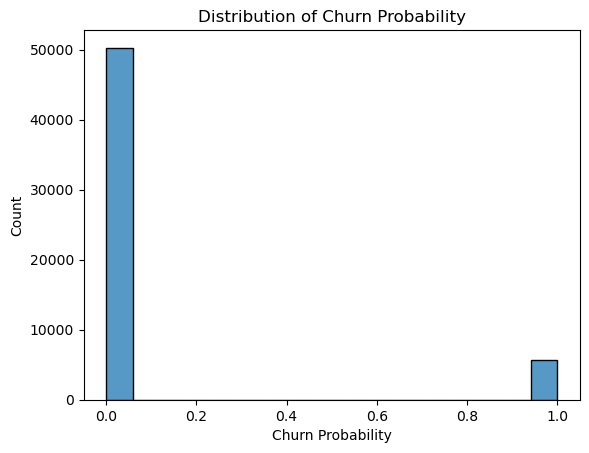

In [581]:
#Distribution for the churn probability
sns.histplot(y_train)
plt.title('Distribution of Churn Probability')
plt.xlabel('Churn Probability')

# IV. Feature Engineering and Selection/Reduction

In [582]:
# Feature Engineering: Create new features for X_train
X_train = X_train.copy()
# Example feature: Difference in recharge amount between months
X_train['rech_amt_diff_7_6'] = X_train['total_rech_amt_7'] - X_train['total_rech_amt_6']
X_train['rech_amt_diff_8_7'] = X_train['total_rech_amt_8'] - X_train['total_rech_amt_7']
    
# Average recharge amount over three months
X_train['avg_rech_amt_6_7_8'] = X_train[['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8']].mean(axis=1)
    
# Total data usage over three months
X_train['total_data_usage'] = X_train['vol_2g_mb_6'] + X_train['vol_2g_mb_7'] + X_train['vol_2g_mb_8'] + \
                             X_train['vol_3g_mb_6'] + X_train['vol_3g_mb_7'] + X_train['vol_3g_mb_8']
    
# Ratio of on-net to off-net usage
X_train['on_off_net_ratio_6'] = X_train['onnet_mou_6'] / (X_train['offnet_mou_6'] + 1)
X_train['on_off_net_ratio_7'] = X_train['onnet_mou_7'] / (X_train['offnet_mou_7'] + 1)
X_train['on_off_net_ratio_8'] = X_train['onnet_mou_8'] / (X_train['offnet_mou_8'] + 1)

In [583]:
# Feature Engineering: Create new features for X_test
X_test = X_test.copy()
# Example feature: Difference in recharge amount between months
X_test['rech_amt_diff_7_6'] = X_test['total_rech_amt_7'] - X_test['total_rech_amt_6']
X_test['rech_amt_diff_8_7'] = X_test['total_rech_amt_8'] - X_test['total_rech_amt_7']
    
# Average recharge amount over three months
X_test['avg_rech_amt_6_7_8'] = X_test[['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8']].mean(axis=1)
    
# Total data usage over three months
X_test['total_data_usage'] = X_test['vol_2g_mb_6'] + X_test['vol_2g_mb_7'] + X_test['vol_2g_mb_8'] + \
                             X_test['vol_3g_mb_6'] + X_test['vol_3g_mb_7'] + X_test['vol_3g_mb_8']
    
# Ratio of on-net to off-net usage
X_test['on_off_net_ratio_6'] = X_test['onnet_mou_6'] / (X_test['offnet_mou_6'] + 1)
X_test['on_off_net_ratio_7'] = X_test['onnet_mou_7'] / (X_test['offnet_mou_7'] + 1)
X_test['on_off_net_ratio_8'] = X_test['onnet_mou_8'] / (X_test['offnet_mou_8'] + 1)

In [584]:
# Align columns of X_test with X_train
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)


In [585]:
# Handle Class Imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train1, y_train1 = smote.fit_resample(X_train, y_train)

NameError: name 'SMOTE' is not defined

## Feature scaling:-

In [ ]:
# Using Standard Scalar to Scale the features:-
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train1)
X_test_scaled = scaler.transform(X_test)

In [ ]:
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
rf.fit(X_train_scaled, y_train)

In [ ]:
rf.feature_importances_

In [ ]:
# Assuming 'X' was used to train the RandomForestClassifier
# Use the column names from X to match the length of rf.feature_importances_
feature_importances = pd.DataFrame({
    'col': X_train.columns,  # Ensures the column names align with features used in the model
    'importance': rf.feature_importances_
})

# Sort the feature importances for better visualization
feature_importances = feature_importances.sort_values(by="importance", ascending=False)

# Display the feature importances
print(feature_importances)

In [ ]:
plt.figure(figsize=(100,8))
plt.xticks(rotation=45)
plt.bar(feature_importances['col'], feature_importances['importance'])

At this step, you can create a bunch of features based on business understanding, such as 

1. "average % gain of 3g volume from month 6 to 8" - (growth or decline of 3g usage month over month?)

2. "ratio of total outgoing amount and age of user on network" - (average daily usage of a user?)

3. "standard deviation of the total amount paid by user for all services" - (too much variability in charges?)

4. etc..



Another way of finding good features would be to project them into a lower dimensional space using PCA. PCA creates components which are a linear combination of the features. This then allows you to select components which explain the highest amount of variance.



Lets try to project the data onto 2D space and plot. **Note:** you can try TSNE, which is another dimensionality reduction approach as well. Check https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html for moree details.

In [ ]:
pca = PCA()
pca_components = pca.fit_transform(X_train_scaled)
sns.scatterplot(x=pca_components[:,0], y=pca_components[:,1], hue=y_train)

In [ ]:
sns.scatterplot(x=pca_components[:,1], y=pca_components[:,2], hue=y_train)

Let's also check which of the components have high feature importances towards the end goal of churn prediction.

In [ ]:
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1)

rf.fit(pca_components, y_train)



#feature_importances = pd.DataFrame({'col':['component_'+str(i) for i in range(16)], 

                                  #  'importance':rf.feature_importances_})



#plt.figure(figsize=(15,8))

#plt.xticks(rotation=45)

#plt.bar(feature_importances['col'], feature_importances['importance'])

# 6. Model building



Let's build a quick model with logistic regression and the first 2 PCA components.

In [ ]:
lr = LogisticRegression(max_iter=1000, tol=0.001, solver='sag')

lr.fit(pca_components[:,:2], y_train)

In [ ]:
lr.score(pca_components[:,:2], y_train)

The model has 89.8% accuracy, but let's build a pipeline to fit and score the model faster.



The steps of this pipeline would be the following, but this is only one type of pipeline -

1. Imputation

2. Scaling

3. PCA

4. Classification model



You can change this pipeline, add addition transformations, change models, use cross validation or even use this pipeline to work with a Gridsearch.

In [586]:
# Model Building with XGBoost
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

In [587]:
# Hyperparameter Tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 7, 10],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

In [588]:
grid_search = GridSearchCV(
    estimator=xgb_clf,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    n_jobs=-1,
    verbose=1
)

In [589]:
grid_search.fit(X_train_scaled, y_train1)

NameError: name 'y_train1' is not defined

In [ ]:
print("Best parameters found: ", grid_search.best_params_)
print("Training accuracy: ", grid_search.score(X_train_scaled, y_train1))
print("Test accuracy: ", grid_search.score(X_test_scaled, y_test))

# Evaluate the Model
y_pred = grid_search.predict(X_test_scaled)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Precision Score:", precision_score(y_test, y_pred))
print("Recall Score:", recall_score(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# 7. Creating submission file



For submission, we need to make sure that the format is exactly the same as the sample.csv file. It contains 2 columns, id and churn_probability

In [ ]:
sample.head()

The submission file should contain churn_probability values that have to be predicted for the unseen data provided (test.csv)

In [590]:
unseen.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
69999,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.890000,8.36,0.00,13.58,0.00,0.0,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.0,0.0,48.93,7.68,28.48,0.0,0.0,0.0,0.00,0.00,0.03,0.0,0.0,0.0,91.94,52.39,57.94,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.0,0.0,0.00,0.36,1.04,4.34,41.73,43.56,36.26,0.505057,0.34,0.39,0.00,0.00,0.00,0.0,0.0,0.00,5.0,5.0,4.0,103.0,90.0,60.0,50.0,30.0,30.0,72.0,37.0,8.0,30.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1692.0,0.00,0.00,0.00,0
70000,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,579.361606,377.26,0.73,0.00,0.00,0.0,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.0,0.0,0.00,23.76,17.68,0.0,0.0,0.8,0.00,0.00,0.00,0.0,0.0,0.0,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.0,0.0,0.00,0.00,12.51,0.00,296.33,339.64,281.66,0.000000,0.00,0.00,114.63,177.88,94.23,0.0,0.0,0.00,5.0,4.0,5.0,500.0,500.0,500.0,250.0,250.0,250.0,74.0,47.0,8.0,250.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2533.0,0.00,0.00,0.00,0
70001,329.844,434.884,746.239,7.54,7.86,8.40,16.98,45.81,45.04,22.81,103.38,26.08,24.53,53.68,54.44,0.00,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,6.0,9.0,5.0,500.0,1000.0,1000.0,300.0,500.0,500.0,64.0,36.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,277.0,525.61,758.41,241.84,0
70002,43.550,171.390,24.400,5.31,2.16,0.00,40.04,205.01,24.01,0.00,0.00,0.00,0.00,0.00,0.00,5.31,0.00,0.00,2.94,98.610000,20.51,0.00,0.00,2.35,0.0,6.18,0.00,8.26,98.61,22.86

Lets first select the columns that we want to work with (or create them, if you have done any feature engineering)

# Initializing variable lists of different categories based on REGEX patterns and Identifying the Columns in unseen data:-

In [591]:
# Identifying numerical and categorical variables
numerical_variables = unseen.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_variables = unseen.select_dtypes(include=['object', 'category']).columns.tolist()

# Verifying the total number of columns
total_columns = len(numerical_variables) + len(categorical_variables)
print(f"Total number of columns: {total_columns}")

# Identifying ID Columns
ids_unseen = ['id','circle_id']

#Identifying the Features
features_unseen = [i for i in unseen.columns if i not in ids_unseen]

#Identifying the Variables
variables_unseen = ids_unseen+features_unseen

#Setting the Index Column
unseen = unseen[variables_unseen].set_index('id')

# Important feature groups in the Telecommunication Industry

# 1. Revenue and Usage Features
arpu = [i for i in unseen.columns if re.search(r'^arpu', i, re.IGNORECASE)]
total_outgoing_minutes = [i for i in unseen.columns if re.search(r'total.+og.+mou', i, re.IGNORECASE)]
total_incoming_minutes = [i for i in unseen.columns if re.search(r'total.+ic.+mou', i, re.IGNORECASE)]
total_data_usage = [i for i in unseen.columns if re.search(r'total_data_vol|data_usage_volume|vol.+[23]g', i, re.IGNORECASE)]
total_usage = [i for i in unseen.columns if re.search(r'monthly', i, re.IGNORECASE)]

# 2. Recharge and Payment Behavior
recharge_amounts = [i for i in unseen.columns if re.search(r'rech.+amt', i, re.IGNORECASE)]
recharge_frequency = [i for i in unseen.columns if re.search(r'rech.+num|monthly_recharge_count', i, re.IGNORECASE)]

# 3. Network Quality and Call Features
roaming_usage = [i for i in unseen.columns if re.search(r'roam.+mou', i, re.IGNORECASE)]
offnet_usage = [i for i in unseen.columns if re.search(r'offnet', i, re.IGNORECASE)]
onnet_usage = [i for i in unseen.columns if re.search(r'onnet', i, re.IGNORECASE)]

# 4. Customer Tenure and Loyalty
age_on_network = [i for i in unseen.columns if re.search(r'\baon\b|age_on_network', i, re.IGNORECASE)]

# 5. Promotions and Package Subscriptions
special_packages = [i for i in unseen.columns if re.search(r'pck|monthly_pack|sachet_pack', i, re.IGNORECASE)]


# Collecting all lists into a single list of important features
important_features = arpu + total_outgoing_minutes + total_incoming_minutes + total_usage  + \
                     recharge_amounts + recharge_frequency + roaming_usage + offnet_usage + \
                     onnet_usage + age_on_network + special_packages 

# Verifying that these features align with key columns
from collections import OrderedDict
important_features = list(OrderedDict.fromkeys(important_features))  # Removes duplicates while preserving order

#Identifying the Other Features that are not Important
others = [i for i in features if i not in important_features]

# Verify count and print grouped lists
print("\nTotal Important Features:")
print(len(important_features))
print("\nImportant Features List:")
print(important_features)

# Print each group
print("\nARPU Features:")
print(arpu)

print("\nTotal Outgoing Minutes:")
print(total_outgoing_minutes)

print("\nTotal Incoming Minutes:")
print(total_incoming_minutes)

print("\nTotal Data Usage:")
print(total_data_usage)

print("\nTotal Usage:")
print(total_usage)

print("\nRecharge Amounts:")
print(recharge_amounts)

print("\nRecharge Frequency:")
print(recharge_frequency)

print("\nRoaming Usage:")
print(roaming_usage)

print("\nOffnet Usage:")
print(offnet_usage)

print("\nOnnet Usage:")
print(onnet_usage)

print("\nAge on Network:")
print(age_on_network)

print("\nSpecial Packages:")
print(special_packages)

print("\nOther Features:")
print(others)

# Final check to ensure all columns are assigned only once across these groups
total_important_columns = len(important_features)
print("\nTotal number of unique important columns:")
print(total_important_columns)

Total number of columns: 121


KeyError: "['id', 'circle_id'] not in index"

# Converting Data Types:-

In [ ]:
# Convert to category data type
to_category_columns = [
    'circle_id', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8',
    'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'monthly_3g_6',
    'monthly_3g_7', 'monthly_3g_8', 'fb_user_6', 'fb_user_7', 'fb_user_8'
]

for col in to_category_columns:
    if col in unseen.columns:
        unseen[col] = unseen[col].astype('category')

# Convert to datetime data type
to_datetime_columns = [
    'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
    'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
    'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8'
]

for col in to_datetime_columns:
    if col in unseen.columns:
        unseen[col] = pd.to_datetime(unseen[col], errors='coerce')

# Verify conversions
print(unseen.dtypes)

In [ ]:
unseen.info(verbose=1)

In [ ]:
unseen.describe(include="all")

# Removing Columns having unique values in all the rows of unseen data:-

In [ ]:
# Removing columns having unique values in all the rows of unseen data
unique_cols = [col for col in unseen.columns if unseen[col].nunique() == 1]
unseen.drop(columns=unique_cols, inplace=True)
print("Data shape after dropping unique columns:", unseen.shape)

## Dropping 'circle_id' Column if there are too many unique values:-


In [ ]:
if 'circle_id' in unseen.columns:
    print("Unique values in circle_id:", unseen['circle_id'].unique())
    unseen.drop(columns='circle_id', inplace=True)
    print("Data shape after dropping 'circle_id':", unseen.shape)

## Handling Missing Values for unseen data:-

In [592]:
missing_data_percent_unseen= 100*unseen.isnull().sum()/len(unseen)
missing_data_percent_unseen

arpu_6                 0.0
arpu_7                 0.0
arpu_8                 0.0
onnet_mou_6            0.0
onnet_mou_7            0.0
onnet_mou_8            0.0
offnet_mou_6           0.0
offnet_mou_7           0.0
offnet_mou_8           0.0
roam_ic_mou_6          0.0
roam_ic_mou_7          0.0
roam_ic_mou_8          0.0
roam_og_mou_6          0.0
roam_og_mou_7          0.0
roam_og_mou_8          0.0
loc_og_t2t_mou_6       0.0
loc_og_t2t_mou_7       0.0
loc_og_t2t_mou_8       0.0
loc_og_t2m_mou_6       0.0
loc_og_t2m_mou_7       0.0
loc_og_t2m_mou_8       0.0
loc_og_t2f_mou_6       0.0
loc_og_t2f_mou_7       0.0
loc_og_t2f_mou_8       0.0
loc_og_t2c_mou_6       0.0
loc_og_t2c_mou_7       0.0
loc_og_t2c_mou_8       0.0
loc_og_mou_6           0.0
loc_og_mou_7           0.0
loc_og_mou_8           0.0
std_og_t2t_mou_6       0.0
std_og_t2t_mou_7       0.0
std_og_t2t_mou_8       0.0
std_og_t2m_mou_6       0.0
std_og_t2m_mou_7       0.0
std_og_t2m_mou_8       0.0
std_og_t2f_mou_6       0.0
s

In [593]:
vars_with_less_missing_values_unseen = missing_data_percent_unseen[missing_data_percent_unseen<=22].index
vars_with_less_missing_values_unseen

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'sachet_2g_7', 'sachet_2g_8', 'sachet_3g_6', 'sachet_3g_7',
       'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'churn_probability'],
      dtype='object', length=122)

In [594]:
unseen_filtered = unseen[vars_with_less_missing_values_unseen]
unseen_filtered.shape

(30000, 122)

In [595]:
# Identify columns to impute in X_train Dataset
missing_cols_unseen = unseen_filtered.columns[unseen_filtered.isnull().any()]


In [596]:
# Separate numeric columns from date columns in `impute_cols_X_train`:
numeric_cols_unseen = unseen_filtered[missing_cols_unseen].select_dtypes(include=['float64', 'int64']).columns
date_cols_unseen = unseen_filtered[missing_cols_unseen].select_dtypes(include=['datetime64']).columns

# Apply SimpleImputer only to numeric columns in X_train:
unseen_filtered[numeric_cols_unseen] = imp.transform(unseen_filtered[numeric_cols_unseen])

# Copy the filtered data into X_train_imputed:
unseen_imputed = unseen_filtered.copy()

# Fill missing values in specific date columns of X_train_imputed:
for col in date_cols_unseen:
    unseen_imputed[col] = unseen_imputed[col].fillna(pd.to_datetime(unseen_imputed[col].dropna().iloc[0]))

# Convert date columns to numeric features (days since prediction date)
# Assuming September 01,2014 is the Prediction Date
prediction_date = pd.to_datetime('2014-09-01')
for col in date_cols_unseen:
    unseen_imputed[col] = (prediction_date - unseen_imputed[col]).dt.days


NotFittedError: This SimpleImputer instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
# List of unwanted columns
columns_to_drop = [
    'loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou', 'std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8', 'std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8'
]

# Drop the unwanted columns
unseen_imputed.drop(columns=[col for col in columns_to_drop if col in unseen_imputed.columns], inplace=True)

# Setting the display options for visibility of complete rows and colums.
pd.set_option('display.max_rows', 70000)
pd.set_option('display.max_columns', 200)

#Verifying the Descriptive Statistics of Remaining Columns
unseen_imputed.describe()


## Handling outliers for unseen data:-

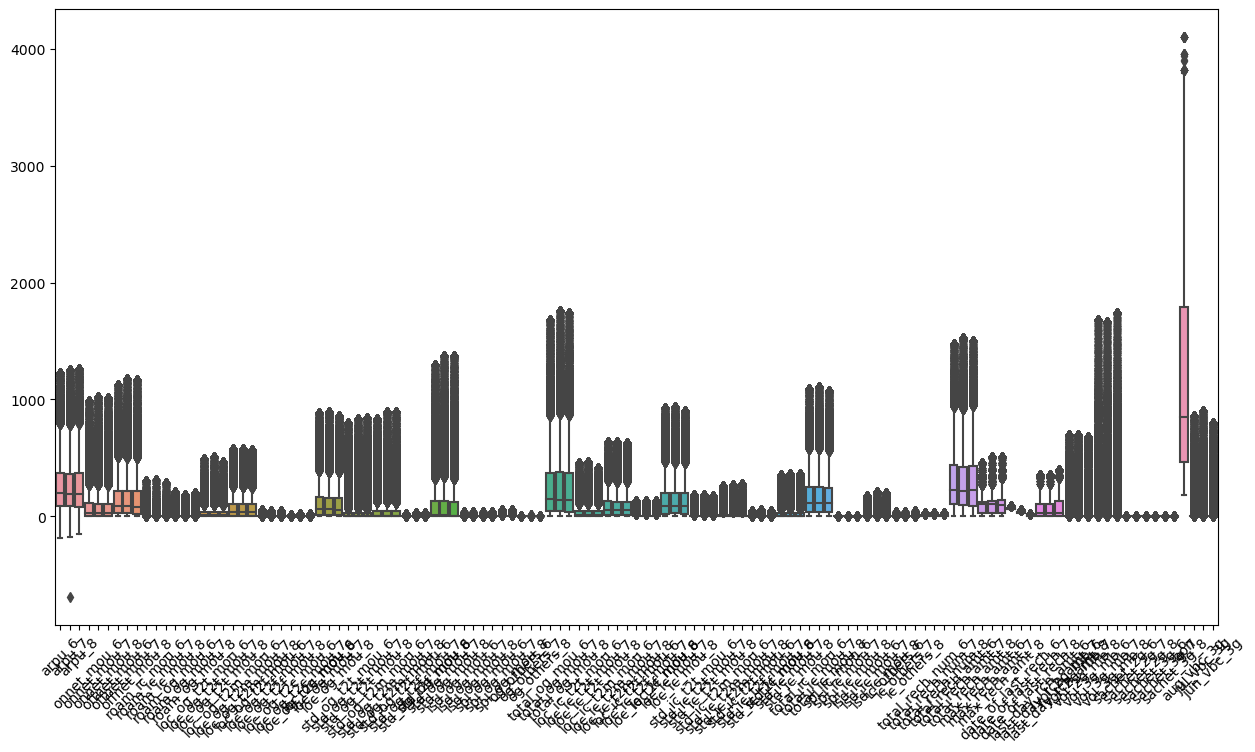

In [597]:
# Define the outlier capping function
def cap_outliers_unseen(array, k=3):
    array_copy3 = array.copy()  # Avoid modifying the original array
    upper_limit = array_copy3.mean() + k * array_copy3.std()
    lower_limit = array_copy3.mean() - k * array_copy3.std()
    array_copy3[array_copy3 < lower_limit] = lower_limit
    array_copy3[array_copy3 > upper_limit] = upper_limit
    return array_copy3

# Identify numeric columns
numeric_cols_unseen = unseen_imputed.select_dtypes(include=['float64', 'int64']).columns

# Apply outlier capping function only to numeric columns
unseen = unseen_imputed[numeric_cols_unseen].apply(cap_outliers_unseen, axis=0)


# Plot the resulting DataFrame to visualize outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=unseen)
plt.xticks(rotation=45)
plt.show()


# Feature Engineering on unseen data:-

In [598]:
# Feature Engineering: Create new features for X_train
unseen = unseen_imputed.copy()
# Example feature: Difference in recharge amount between months
unseen['rech_amt_diff_7_6'] = unseen['total_rech_amt_7'] - unseen['total_rech_amt_6']
unseen['rech_amt_diff_8_7'] = unseen['total_rech_amt_8'] - unseen['total_rech_amt_7']
    
# Average recharge amount over three months
unseen['avg_rech_amt_6_7_8'] = unseen[['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8']].mean(axis=1)
    
# Total data usage over three months
unseen['total_data_usage'] = unseen['vol_2g_mb_6'] + unseen['vol_2g_mb_7'] + unseen['vol_2g_mb_8'] + \
                             unseen['vol_3g_mb_6'] + unseen['vol_3g_mb_7'] + unseen['vol_3g_mb_8']
    
# Ratio of on-net to off-net usage
unseen['on_off_net_ratio_6'] = unseen['onnet_mou_6'] / (unseen['offnet_mou_6'] + 1)
unseen['on_off_net_ratio_7'] = unseen['onnet_mou_7'] / (unseen['offnet_mou_7'] + 1)
unseen['on_off_net_ratio_8'] = unseen['onnet_mou_8'] / (unseen['offnet_mou_8'] + 1)

## Align columns with training data:-

In [599]:
unseen = unseen.reindex(columns=X_train.columns, fill_value=0)

## Feature Scaling for unseen data:-

In [600]:
unseen_scaled = scaler.transform(unseen_preprocessed)


NameError: name 'scaler' is not defined

In [ ]:
# Predict on unseen data
unseen['churn_probability'] = grid_search.predict(unseen_scaled)

In [ ]:
# Prepare submission file
output = unseen.reset_index()[['id', 'churn_probability']]
output.to_csv('submission-13-11-2024.csv', index=False)
